<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Probability%20theory%20and%20mathematical%20statistics/homework1_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на датасет:
https://drive.google.com/file/d/1XB_yieTBz0aoJLbmT51w7MiHbk3J0rRo/view?usp=sharing

In [89]:
!gdown 1XB_yieTBz0aoJLbmT51w7MiHbk3J0rRo

Downloading...
From: https://drive.google.com/uc?id=1XB_yieTBz0aoJLbmT51w7MiHbk3J0rRo
To: /content/spam_classes.csv
100% 1.13k/1.13k [00:00<00:00, 4.19MB/s]


In [90]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom, poisson, expon, norm, uniform, weibull_min, mode

___

## Задание 1: Визуальный анализ распределений случайных величин
### Постройте гистограмы для следующих распределений:
1. Равномерное с параметрами (0, 1)
2. Нормальное распределение с параметрами mu=0, sigma=1
3. Распределение Вейбулла с x = 10, c = 7 (взять функцию weibull_min из scipy.stats)

___

**Равномерное с параметрами (0, 1) через numpy**

<Axes: ylabel='Count'>

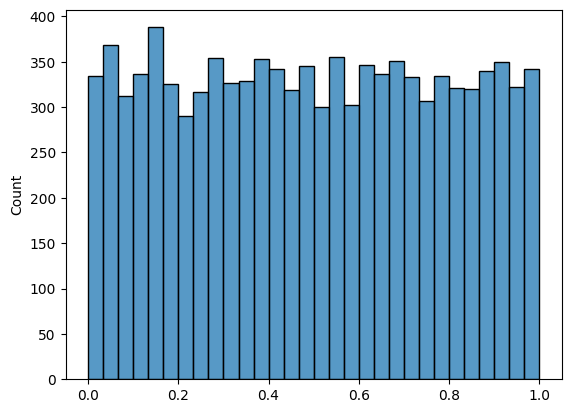

In [91]:
low, high = 0, 1
uniform_dist = np.random.uniform(low=low, high=high, size=10000)
sns.histplot(uniform_dist, bins=30)

**Нормальное распределение с параметрами mu=0, sigma=1 через scipy**

<Axes: ylabel='Count'>

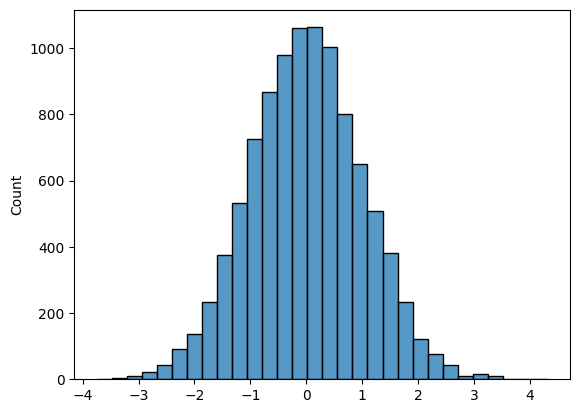

In [92]:
mu, sigma = 0, 1
norm_dist = norm(loc=mu, scale=sigma).rvs(10000)
sns.histplot(norm_dist, bins=30)

**Распределение Вейбулла с x = 10, c = 7 (взять функцию weibull_min из scipy.stats)**

<Axes: ylabel='Count'>

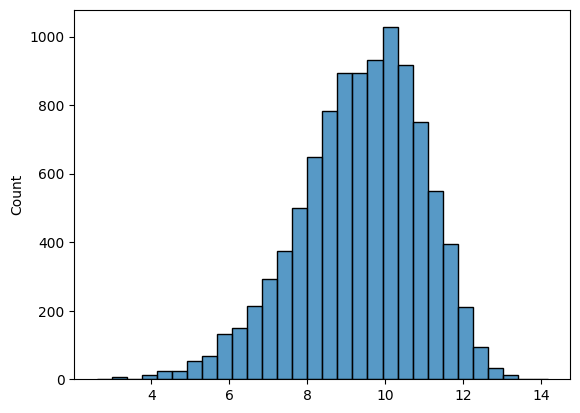

In [93]:
c = 7
x = 10
weibull_dist = weibull_min(c=c, scale=x).rvs(10000)
sns.histplot(weibull_dist, bins=30)

## Задание 2: Свойства нормального распределения
### Случайная величина имеет нормальное распределение с параметрами mu = 10, sigma = 2.
1. Дайте текстовый ответ, что такое "Правило трёх сигм"?
2. Рассчитайте вероятность того, что случайная величина примет значение больше 16. (Поможет метод cdf)
3. Какому значению случайной величины соответствует 5-й персентиль функции распределения? (Поможет метод ppf)
4. Рассчитайте точную оценку вероятности того, что случайная величина из нормального распределения с такими параметрами не отклонится от математического ожидания больше чем на 2 сигмы. А на 1 сигму?

___

**Дайте текстовый ответ, что такое "Правило трёх сигм"?**

Это подход оценки отклонения случайной величины от среднего значения. От пика нормального распределения, то есть среднего значения (обозначим его за m), значения величины будут находиться в пределах трёх сигм.
В пределах (m - sigma, m + sigma) находится примерно 68% значений переменной.
В (m - 2 sigma, m + 2 sigma) примерно 95% значений.
В (m - 3 sigma, m + 3 sigma) примерно 99% значений.
Это правило работает только в случае похожего на нормальное распределения данных.

Случайная величина имеет нормальное распределение с параметрами mu = 10, sigma = 2.

**Рассчитайте вероятность того, что случайная величина примет значение больше 16. (Поможет метод cdf)**

In [94]:
mu, sigma = 10, 2
threshold = 16
prob_greater_threshold = 1 - norm.cdf(threshold, loc=mu, scale=sigma)
prob_greater_threshold

np.float64(0.0013498980316301035)

**Какому значению случайной величины соответствует 5-й персентиль функции распределения? (Поможет метод ppf)**

<Axes: ylabel='Count'>

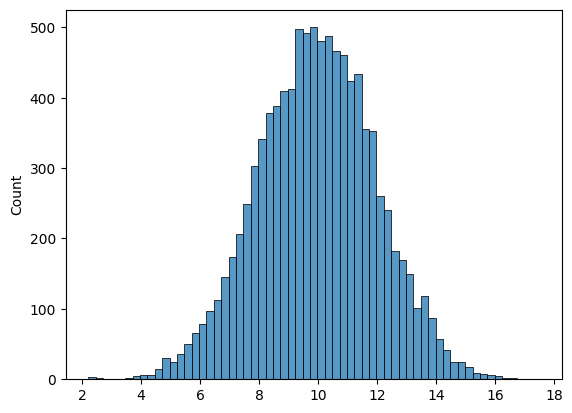

In [95]:
mu, sigma = 10, 2
percent_norm = norm(loc=mu, scale= sigma).rvs(10000)
sns.histplot(percent_norm)


In [96]:
percentile = 0.05
percentile_value = norm.ppf(percentile, loc=mu, scale=sigma)
percentile_value

np.float64(6.710292746097054)

**Рассчитайте точную оценку вероятности того, что случайная величина из нормального распределения с такими параметрами не отклонится от математического ожидания больше чем на 2 сигмы. А на 1 сигму?**

In [97]:
mu, sigma = 10, 2
norm_dist = norm(loc=mu, scale=sigma)
# Рассчитаем через разность двух cdf, так как двухаргументная версия из документации почему-то не работает https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.Normal.cdf.html
prob_inside_2sigma = norm_dist.cdf(mu + 2*sigma) - norm_dist.cdf(mu - 2*sigma)
prob_inside_1sigma = norm_dist.cdf(mu + sigma) - norm_dist.cdf(mu - sigma)

print(f'P({mu - sigma} <= X < {mu + sigma}) = {prob_inside_1sigma} --- probability inside 1 sigma interval')
print(f'P({mu - 2*sigma} <= X < {mu + 2*sigma}) = {prob_inside_2sigma} --- probability inside 2 sigma interval')

P(8 <= X < 12) = 0.6826894921370859 --- probability inside 1 sigma interval
P(6 <= X < 14) = 0.9544997361036416 --- probability inside 2 sigma interval


## Задание 3: Зависимые случайные величины
### Что такое зависимые случайные величины, дайте развёрнутый текстовый ответ?

Пусть имеется случайная величина ${X}$ из равномерного распределения с параметрами (0, 1). Вторая случайная величина, ${Y}$, получена путём возведения первой в квадрат и прибавления единицы. Будут ли эти случайные величины зависимы? С помощью какой статистики можно оценить "меру зависимости" двух этих случайных величин?

Рассмотрим случайную величину ${X + Y}$. Напишите формулы, по которым считаются математическое ожидание и дисперсия для суммы зависимых случаных величин. Рассчитайте математическое ожидание и диспресию случайной величины ${X + Y}$, сгенерировав распределения ${X}$ и ${Y}$. Достаточно будет 1000 наблюдений.

___

**Что такое зависимые случайные величины, дайте развёрнутый текстовый ответ?**

Случайные величины X и Y являются зависимыми, если значение одной из величин влияет на значение другой. В отличие от независимых величин, где вероятность происхождения двух событий равна произведению их вероятностей P(XY) = P(X) * P(Y), в контексте зависимых величин, это не работает, то есть P(XY) != P(X) * P(Y). Для зависимых величин ковариация и, соответственно, корреляция отличны от нуля.

**Пусть имеется случайная величина  X  из равномерного распределения с параметрами (0, 1). Вторая случайная величина,  Y , получена путём возведения первой в квадрат и прибавления единицы. Будут ли эти случайные величины зависимы? С помощью какой статистики можно оценить "меру зависимости" двух этих случайных величин?**

Величины X и Y будут зависимы из-за того, что по условию дана функциональная зависимость получения Y от X путём возведения X в квадрат и прибавления единицы, то есть Y = X^2 + 1. Меру зависимости Y от X можно оценить, посчитав ковариацию или корреляцию.

**Рассмотрим случайную величину  X+Y . Напишите формулы, по которым считаются математическое ожидание и дисперсия для суммы зависимых случаных величин. Рассчитайте математическое ожидание и диспресию случайной величины  X+Y , сгенерировав распределения  X  и  Y . Достаточно будет 1000 наблюдений.**

Случайная величина: (X+Y)

Математическое ожидание: E(X+Y) = E(X) + E(Y)


Дисперсия: Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)

In [98]:
np.random.seed(42)

# Зависимые случайные величины и их сумма
X = np.random.uniform(0, 1, 1000)
Y = X**2 + 1
Z = X + Y

# Проверим формулу матожидания
E_X = np.mean(X)
E_Y = np.mean(Y)
E_Z = np.mean(Z)
E_Z_theory = E_X + E_Y
print('Матожидание')
print(f'E(X) = {E_X}')
print(f'E(Y) = {E_Y}')
print(f'E(X+Y) = {E_Z} -- как матожидание величины от суммы величин')
print(f'E(X+Y) = {E_Z_theory} -- как матожидание через формулу')
print(f'Разница -- {abs(E_Z_theory - E_Z)}')
print('-'*20)

#Расчет дисперсии и ковариации
Var_X = np.var(X, ddof = 1)
Var_Y = np.var(Y, ddof = 1)
Var_Z = np.var(Z, ddof = 1)
Cov_XY = np.cov(X, Y)[0,1]
Var_Z_theory = Var_X + Var_Y + 2*Cov_XY
print('Дисперсия')
print(f'Var(X) = {Var_X}')
print(f'Var(Y) = {Var_Y}')
print(f'Var(X+Y) = {Var_Z} -- как дисперсия величины от суммы величин')
print(f'Var(X+Y) = {Var_Z_theory} -- как дисперсия через формулу')
print(f'Разница -- {abs(Var_Z_theory - Var_Z)}')

Матожидание
E(X) = 0.4902565533201336
E(Y) = 1.325610382080728
E(X+Y) = 1.8158669354008614 -- как матожидание величины от суммы величин
E(X+Y) = 1.8158669354008614 -- как матожидание через формулу
Разница -- 0.0
--------------------
Дисперсия
Var(X) = 0.08534423824563644
Var(Y) = 0.08955517903542184
Var(X+Y) = 0.3441947627789386 -- как дисперсия величины от суммы величин
Var(X+Y) = 0.3441947627789386 -- как дисперсия через формулу
Разница -- 0.0


## Задание 4: Детектор спама

В таблице `spam_classes.csv` представлены результаты классификации 100 писем, полученных от пользователей. В столбце `is_spam` указано, является ли письмо спамом, а в столбце `marked_spam` — результат работы классификатора.

Задача:
1. Оцените с помощью формулы Байеса вероятность того, что письмо, классифицированное как спам, действительно является спамом. Вероятности, необходимые для применения формулы, рассчитайте по данным в DataFrame
2. С помощью DataFrame посчитайте фактическую вероятность того, что письмо, классифицированное как спам, действительно является спамом.


___

In [99]:
df = pd.read_csv('spam_classes.csv')
df.head()

,is_spam,marked_spam
0,True,True
1,False,True
2,False,False
3,False,False
4,True,False


**Оцените с помощью формулы Байеса вероятность того, что письмо, классифицированное как спам, действительно является спамом. Вероятности, необходимые для применения формулы, рассчитайте по данным в DataFrame**

Пусть спам = S, классифицировано как спам = M

Формула Байеса:

P(S|M) = P(M|S) * P(S) / P(M)


In [100]:
prob_m_and_s = len(df[(df['is_spam'] == True) & (df['marked_spam'] == True)]) / len(df)
prob_s = len(df[df['is_spam'] == True]) / len(df)
prob_m_cond_s = prob_m_and_s / prob_s
prob_m = len(df[df['marked_spam'] == True]) / len(df)
prob_sm = prob_m_cond_s * prob_s / prob_m
print(f'P(S|M) = {prob_sm} -- по формуле Байеса')

P(S|M) = 0.9333333333333332 -- по формуле Байеса


**С помощью DataFrame посчитайте фактическую вероятность того, что письмо, классифицированное как спам, действительно является спамом.**

Формула условной вероятности:

P(S|M) = P(SM) / P(M)

In [101]:
prob_m_and_s = len(df[(df['is_spam'] == True) & (df['marked_spam'] == True)]) / len(df)
prob_m = len(df[df['marked_spam'] == True]) / len(df)
prob_sm_direct = prob_m_and_s / prob_m
print(f'P(S|M) = {prob_sm_direct} -- фактическая вероятность')

P(S|M) = 0.9333333333333332 -- фактическая вероятность


## Задание 5: Расчет вероятностей исходя из разных распределений

Перед вами ниже находится несколько задач на расчет вероятностей. Ваша задача: определить с помощью какого распределения можно решить задачу и вычислить вероятность с помощью функций плотности распределения из `scipy`.

1. Баскетболист совершает 20 штрафных бросков за игру. Вероятность успеха каждого броска составляет 70%. Какова вероятность того, что игрок совершит не менее 15 бросков?
2. Время между прибытиями автобусов составляет в среднем 10 минут. Какова вероятность того, что автобус прибудет в течение 5 минут?
3. Средний рост взрослого человека составляет 170 см, дисперсия составляем - 100 см. Какова вероятность того, что случайно выбранный взрослый человек имеет рост от 160 до 180 см?
4. В большом лесу среднее количество медведей составляет 2 особи на квадратный километр. Какова вероятность встретить 5 и более медведей на квадратном километре?

___

**Баскетболист совершает 20 штрафных бросков за игру. Вероятность успеха каждого броска составляет 70%. Какова вероятность того, что игрок совершит не менее 15 бросков?**

В этой задаче представлено биномиальное распределение, так как испытания независимы, есть ровно 2 исхода - успех или неудача, число испытаний фиксировано, вероятность успеха постоянна.

In [102]:
shots = 20
p = 0.7
success = 15
# В документации, кроме метода cdf, увидел sf = 1 - cdf, поэтому решил, что здесь будет рациональнее использовать его
# !! Оставьте комментарий, что из них использовать практичнее и яснее !!
prob_shots = binom.sf(k = success - 1, n = shots, p = p)
prob_shots

np.float64(0.41637082944748116)

**Время между прибытиями автобусов составляет в среднем 10 минут. Какова вероятность того, что автобус прибудет в течение 5 минут?**

В этой задаче экспоненциальное распределение, которое отвечает на вопрос, через какой интервал времени произойдет следующий успех. События происходят независимо с постоянной средней скоростью.


In [103]:
lambda_const = 10
time = 5
prob_in_time = expon.cdf(time, scale=lambda_const)
prob_in_time

np.float64(0.3934693402873666)

**Средний рост взрослого человека составляет 170 см, дисперсия составляем - 100 см. Какова вероятность того, что случайно выбранный взрослый человек имеет рост от 160 до 180 см?**

Здесь представлено нормальное распределение. Рост - величина непрерывная, симметрична вокруг среднего значения и, как было разобрано на лекции, на неё действует ЦПТ

In [104]:
mu = 170
sigma = np.sqrt(100)
height_dist = norm(loc=mu, scale = sigma)
mn, mx = 160, 180
prob_mn_to_mx = height_dist.cdf(mx) - height_dist.cdf(mn)
prob_mn_to_mx

np.float64(0.6826894921370859)

**В большом лесу среднее количество медведей составляет 2 особи на квадратный километр. Какова вероятность встретить 5 и более медведей на квадратном километре?**

В этой задаче распределение Пуассона, так как они редки, случайны, независимы.

In [105]:
mu = 2
cnt = 5

# Здесь ещё раз использовал sf вместо cdf
prob_cnt_more = poisson.sf(cnt - 1, mu)
prob_cnt_more

np.float64(0.052653017343711125)

## Задание 6: Распределения статистик, Метод Монте-Карло
### Выборка случайных величин {${X_i}$} взята из равномерного распределения с параметрами (0, 100).
1. С помощью метода Монте-Карло постройте распределение выборочного среднего для выборки {${X_i}$}.
2. Каким будет распределение выборочного среднего и почему?
3. Постройте распределения для выборочных СКО, медианы и 16-го персентиля.

___

**С помощью метода Монте-Карло постройте распределение выборочного среднего для выборки { Xi }.**

In [106]:
X_means = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_means.append(np.mean(X))

<Axes: ylabel='Count'>

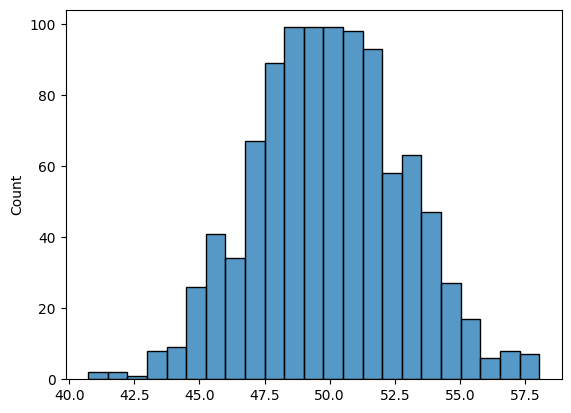

In [107]:
sns.histplot(X_means)

In [108]:
X_means = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_means.append(np.mean(X))

<Axes: ylabel='Count'>

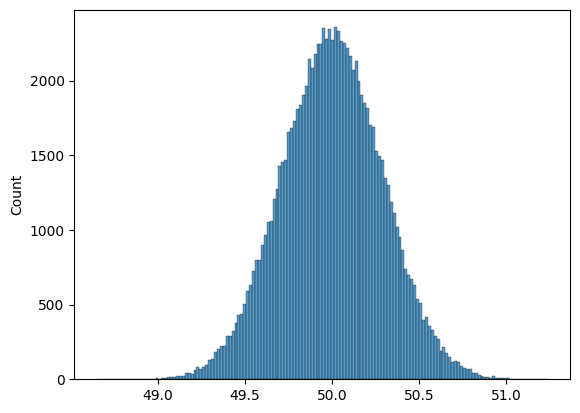

In [109]:
sns.histplot(X_means)

**Каким будет распределение выборочного среднего и почему?**

Даже несмотря на то, что рассматривалось равномерное распределение, можно увидеть, что распределение выборочных средних является нормальным. Это происходит из-за работы ЦПТ - центральной предельной теоремы. Чем больше выборок мы рассматриваем, тем ближе их среднее значение к среднему генеральной совокупности, то есть к 50. Можем увидеть этот эффект как на первом графике с меньшим количеством экспериментов, так и более явно на втором графике.

В итоге получим нормальное распределение с средним практически равным среднему генеральной совокупности E(X) = mu и стандартным отклонением SE = sigma/sqrt(n)

**Постройте распределения для выборочных СКО, медианы и 16-го персентиля.**

Распределение для выборочных СКО

In [110]:
X_stds = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_stds.append(np.std(X, ddof=1))

<Axes: ylabel='Count'>

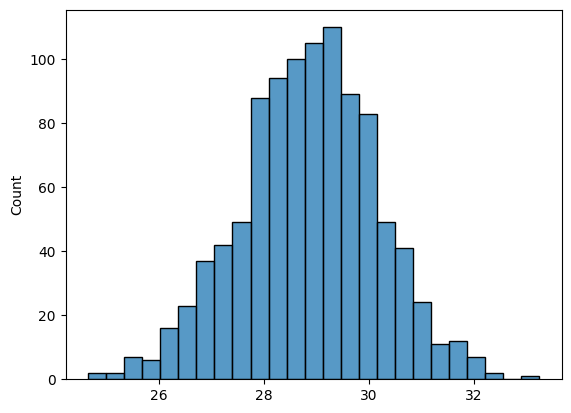

In [111]:
sns.histplot(X_stds)

In [112]:
X_stds = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_stds.append(np.std(X, ddof=1))

<Axes: ylabel='Count'>

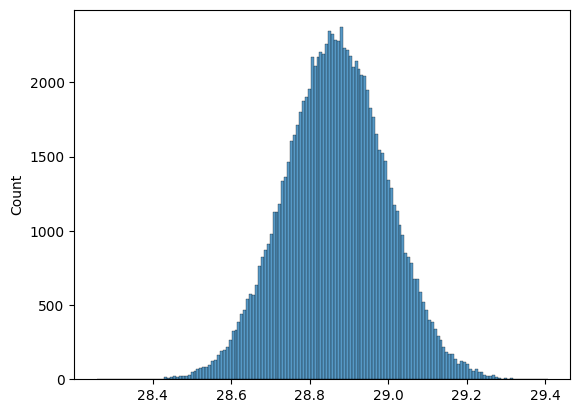

In [113]:
sns.histplot(X_stds)

Распределение для выборочных медиан

In [114]:
X_medians = []
steps = 1000
low, high, size = 0, 100, 100
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_medians.append(np.median(X))

<Axes: ylabel='Count'>

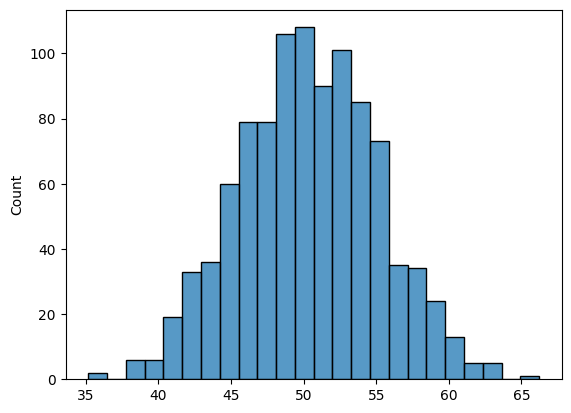

In [115]:
sns.histplot(X_medians)

In [116]:
X_medians = []
steps = 100000
low, high, size = 0, 100, 10000
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_medians.append(np.median(X))

<Axes: ylabel='Count'>

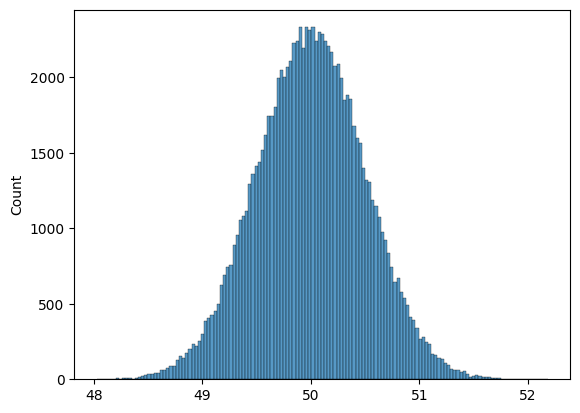

In [117]:
sns.histplot(X_medians)

Распределение для 16-го персентиля

In [127]:
X_percentiles = []
steps = 1000
low, high, size = 0, 100, 100
percentile = 16
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_percentiles.append(np.percentile(X, percentile))

<Axes: ylabel='Count'>

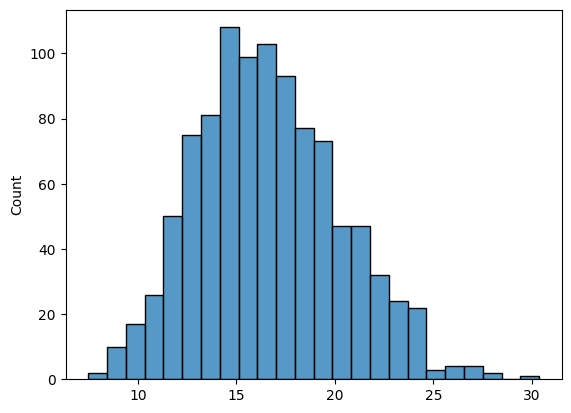

In [128]:
sns.histplot(X_percentiles)

In [129]:
X_percentiles = []
steps = 100000
low, high, size = 0, 100, 10000
percentile = 16
for _ in range(steps):
  X = np.random.uniform(low=low, high=high, size=size)
  X_percentiles.append(np.percentile(X, percentile))

<Axes: ylabel='Count'>

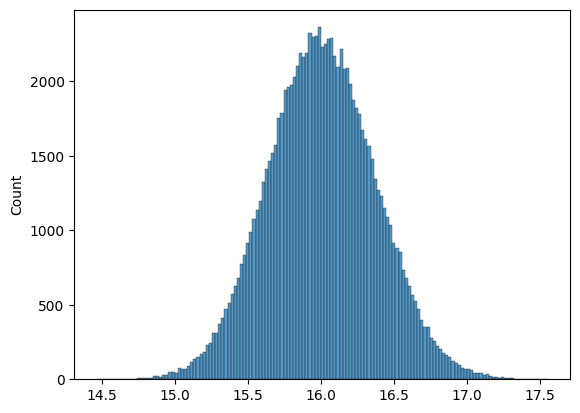

In [130]:
sns.histplot(X_percentiles)

Видим, что для распределения каждой из величин наблюдается такой же эффект работы ЦПТ, как и для среднего значения выборок. Для 16-го персентиля сначала наблюдается асимметричное распределение, затем с увеличением числа выборок, оно так же становится нормальным